In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import seed
from random import gauss
import random
from collections import Counter

In [2]:
# funções auxiliares

from math import log10, floor

def round_it(x, sig):
    return round(x, sig - int(floor(log10(abs(x)))) - 1)


# Tempo de queda da esfera

Expressão para o tempo de queda de uma altura de 1.5 m

## Dados reais para o cálculo do desvio padrão 

In [3]:
tempos_ordem = pd.read_csv('tempos.csv')
tempos = tempos_ordem.sample(frac=1).reset_index().drop(columns=['index'])

In [4]:
tempos

,tempos
0,0.44
1,0.31
2,0.36
3,0.31
4,0.61
...,...
595,0.39
596,0.54
597,0.48
598,0.58


<Axes: ylabel='Count'>

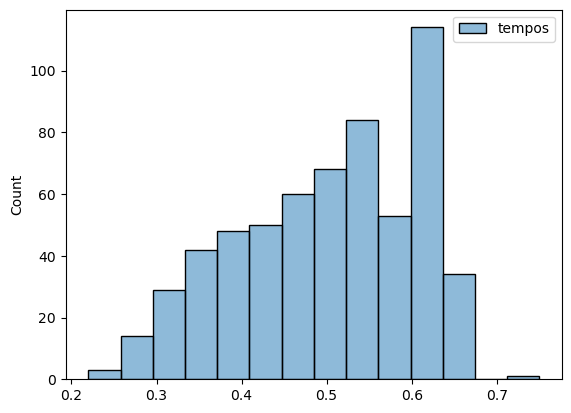

In [5]:
sns.histplot(tempos)

In [6]:
tempos.describe()

,tempos
count,600.000000
mean,0.503267
std,0.104925
min,0.220000
25%,0.430000
50%,0.520000
75%,0.590000
max,0.750000


In [7]:
desvio_padrao = tempos.std().item()
desvio_padrao

0.10492542333959805

## Simulação

In [8]:
def medidas(N_conj, N_medidas, h, desvio_padrao):
    t = (2*h/9.787899) **(0.5)
        
    medidas = pd.Series([gauss(t,desvio_padrao) for i in range(N_medidas)])
        
    estatistica = pd.DataFrame(columns=['media', 'desvio', 'incerteza'])
    for i in range(1, N_conj+1):
        medidas_frac = medidas.iloc[:int(i*N_medidas/N_conj)]
        estatistica_frac = pd.DataFrame({
            'media':[medidas_frac.mean()],
            'desvio':[medidas_frac.std()],
            'incerteza':[medidas_frac.std()/(medidas_frac.size)**0.5],
        })
        estatistica = pd.concat([estatistica, estatistica_frac])
    
    return medidas, estatistica.reset_index()


In [9]:
def estatistica(N_conj, dados, h):
        
    medidas = dados
    N_medidas = len(dados)
    
    estatistica = pd.DataFrame(columns=['media', 'desvio', 'incerteza'])
    for i in range(1, N_conj+1):
        medidas_frac = medidas.iloc[:int(i*N_medidas/N_conj)]
        estatistica_frac = pd.DataFrame({
            'media':[medidas_frac.mean()],
            'desvio':[medidas_frac.std()],
            'incerteza':[medidas_frac.std()/(medidas_frac.size)**0.5],
        })
        estatistica = pd.concat([estatistica, estatistica_frac])
    
    return estatistica.reset_index()


### Aplicação no conjunto real

In [10]:
mreal = tempos['tempos']
ereal = estatistica(10, tempos['tempos'], 1.5)

### Primeiro conjunto de teste

In [11]:
def plot_dados(m1,h):
    fig, ax = plt.subplots()
        
    m1.plot(
            ax=ax,
            color='orange',
            marker='o',
            ls=':',
        )
        
    t = (2*h/9.787899) **(0.5)
        
    ax.axhline(
            t,
            color='blue',
            ls='--',
            label='valor de referência',
        )
    ax.set_title('Conjunto de dados')
    #ax.set_xlabel('dados')
    ax.set_ylabel('tempo de queda (s)')
    ax.legend(ncols=1)
    
    ax.text(
            0.5,
            0.5,
            "MP-resuldados",
            transform=ax.transAxes,
            fontsize=40,
            color="gray",
            alpha=0.1,
            ha="center",
            va="center",
            rotation=45,
            )
    return fig, ax

In [12]:
m1, e1 = medidas(10, 100, 1.5, 0.1)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Conjunto de dados'}, ylabel='tempo de queda (s)'>)

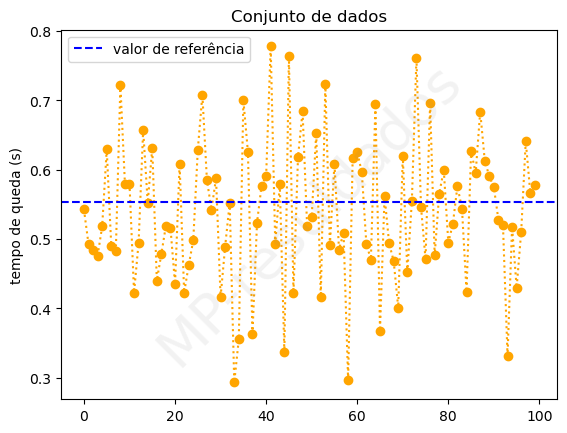

In [13]:
plot_dados(m1, 1.5)

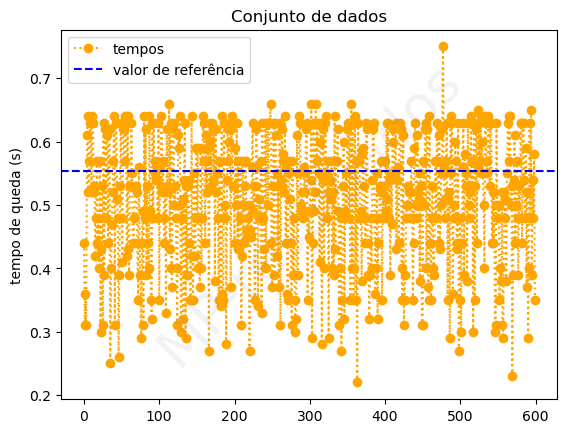

In [14]:
figura0 = plot_dados(mreal, 1.5)[0]
figura0.savefig('dados.png') 

In [15]:
def plot_medias(estatistica, h):
    fig, ax = plt.subplots()

    t = (2*h/9.787899) **(0.5)

        # valor de referência
    ax.axhline(t,
        color='blue',
        linestyle='dashed',
        label='valor de referência'
        )
            
        # média e incerteza
    ax.errorbar(
            10*(1+estatistica.index),
            estatistica['media'],
            yerr = estatistica['incerteza'],
            color='orange',
            marker='.',
            linestyle='none',
            label='valores médios'
        )
    
    ax.set_title('Evolução do valor médio')
    ax.set_xlabel('% dos dados')
    ax.set_ylabel('tempo de queda (s)')
    ax.legend(ncols=1)
    
    ax.text(
            0.5,
            0.5,
            "MP-resuldados",
            transform=ax.transAxes,
            fontsize=40,
            color="gray",
            alpha=0.1,
            ha="center",
            va="center",
            rotation=45,
            )
    
    return fig, ax

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Evolução do valor médio'}, xlabel='% dos dados', ylabel='tempo de queda (s)'>)

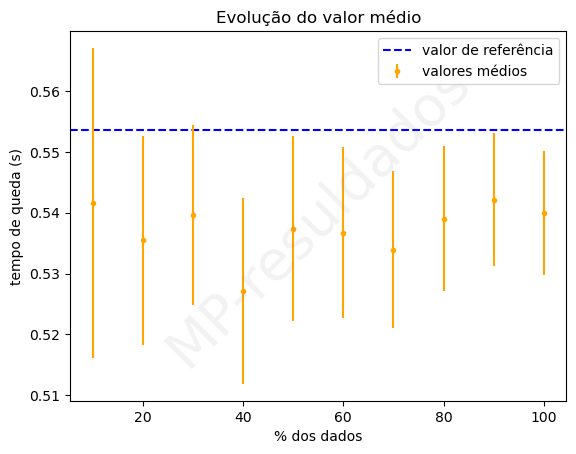

In [16]:
plot_medias(e1, 1.5)

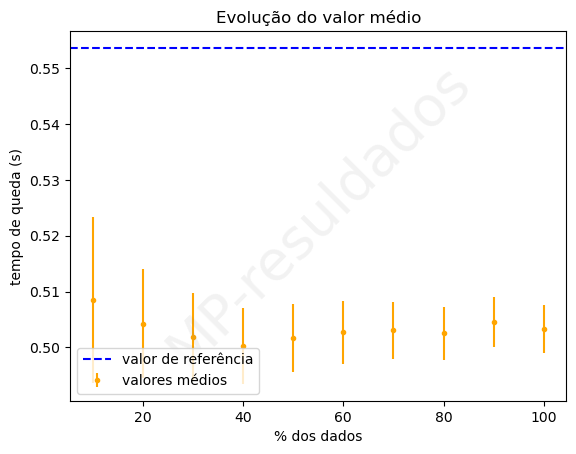

In [17]:
figura = plot_medias(ereal, 1.5)[0]
figura.savefig('medias.png') 

### Histogramas

In [18]:
def plot_hist(m1):
    fig, axs_arr = plt.subplots(2, 2, sharex=True, sharey=True)

    axs = [ax for axs in axs_arr for ax in axs]
    fracs = [.25, .50, .75, 1]
    colors = ['orange', 'r', 'g', 'b']

    for ax, frac, color in zip(axs, fracs, colors):
    
        a = m1[:int(frac*len(m1))]
    
        sns.histplot(a, alpha=0.4, ax=ax, label=f'{int(100*frac)}%', color=color)

        ax.set_xlabel('tempo de queda (s)')
        ax.set_ylabel('contagem')
        ax.legend(loc='upper right')
    
    fig.text(
            0.5,
            0.5,
            "MP-resuldados",
            fontsize=50,
            color="gray",
            alpha=0.1,
            ha="center",
            va="center",
            rotation=45,
    )
    
    return fig, ax    

(<Figure size 640x480 with 4 Axes>,
 <Axes: xlabel='tempo de queda (s)', ylabel='contagem'>)

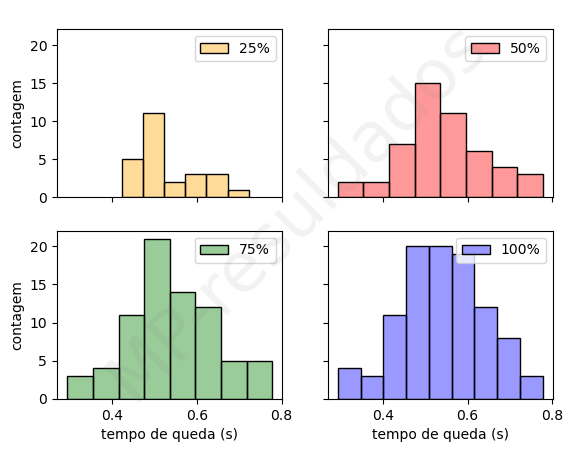

In [19]:
plot_hist(m1)

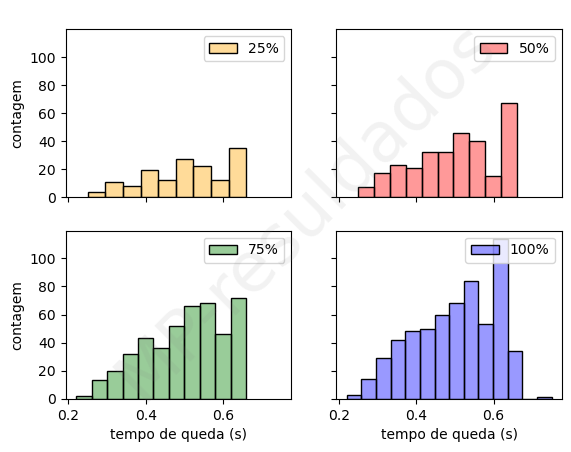

In [20]:
figura2 = plot_hist(mreal)[0]
figura2.savefig('hist.png') 

### Comparação do desvio padrão com a resolução do cronômetro

In [21]:
def plot_desvio(estatistica):
    fig, ax = plt.subplots()

        # resolução do cronômetro
    ax.axhline(0.01,
            color='green',
            linestyle='dotted',
            label='resolução do cronômetro'
            )

        # desvio para diversos conjuntos com quantidade de medidas diferentes
    ax.plot(
            10*(1+estatistica.index),
            estatistica['incerteza'],
            color='orange',
            marker='o',
            linestyle='none',
            label='Incerteza do valor médio'
            )


    ax.set_title('Evolução da incerteza do valor médio')
    ax.set_xlabel('% dos dados')
    ax.set_ylabel('tempo de queda (s)')
    ax.legend(ncols=1)
    
    ax.text(
            0.5,
            0.5,
            "MP-resuldados",
            transform=ax.transAxes,
            fontsize=40,
            color="gray",
            alpha=0.1,
            ha="center",
            va="center",
            rotation=45,
            )
    
    
    return fig, ax

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Evolução da incerteza do valor médio'}, xlabel='% dos dados', ylabel='tempo de queda (s)'>)

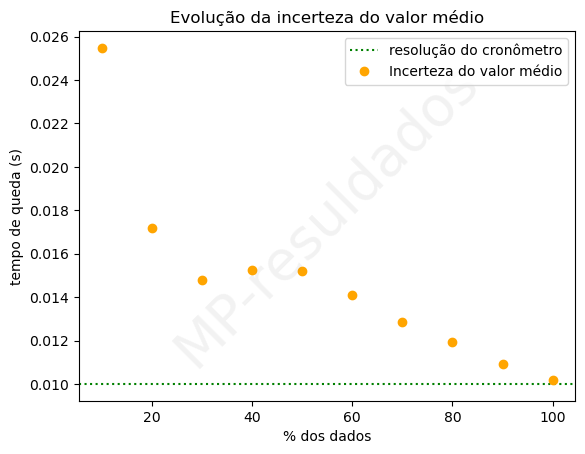

In [22]:
plot_desvio(e1)

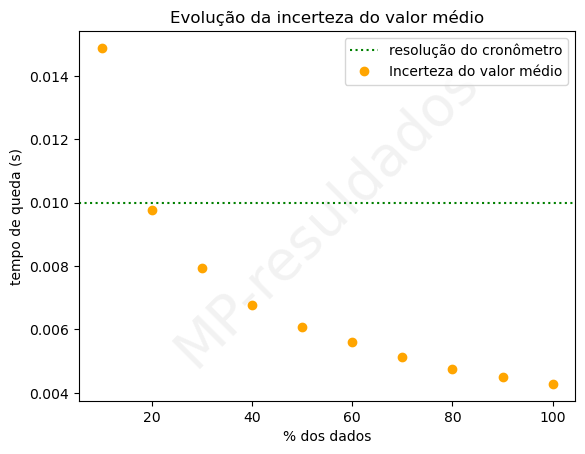

In [23]:
figura3 = plot_desvio(ereal)[0]
figura3.savefig('desvio.png') 